# Wine Clustering

In [1]:
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn import mixture

import matplotlib.pyplot as plt

import warnings

Load our cleaned data, where we have converted the province and variety from a categorical attribute to a numerical attribute and extracted the vintage of each wine form the title. After removing the samples with null values, we reduced the size of our dataset from 125000 to 22000.

In [2]:
data = pd.read_csv("final_clean_wine.csv")
print(data.shape)
data.head()

(22010, 17)


,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,province_id,variety_numerical,vintage
0,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,2,440,2012
1,10,US,"Soft, supple plum envelopes an oaky structure ...",Mountain Cuvée,87,19.0,California,Napa Valley,Napa,Virginie Boone,@vboone,Kirkland Signature 2011 Mountain Cuvée Caberne...,Cabernet Sauvignon,Kirkland Signature,7,80,2011
2,23,US,This wine from the Geneseo district offers aro...,Signature Selection,87,22.0,California,Paso Robles,Central Coast,Matt Kettmann,@mattkettmann,Bianchi 2011 Signature Selection Merlot (Paso ...,Merlot,Bianchi,7,326,2011
3,25,US,Oak and earth intermingle around robust aromas...,King Ridge Vineyard,87,69.0,California,Sonoma Coast,Sonoma,Virginie Boone,@vboone,Castello di Amorosa 2011 King Ridge Vineyard P...,Pinot Noir,Castello di Amorosa,7,440,2011
4,35,US,As with many of the Erath 2010 vineyard design...,Hyland,86,50.0,Oregon,McMinnville,Willamette Valley,Paul Gregutt,@paulgwine,Erath 2010 Hyland Pinot Noir (McMinnville),Pinot Noir,Erath,2,440,2010


Extract the data we want to cluster and analyze for our project. 

In [3]:
clustering_data = data.loc[:,['province_id','variety_numerical','vintage']]
clustering_data.head()

,province_id,variety_numerical,vintage
0,2,440,2012
1,7,80,2011
2,7,326,2011
3,7,440,2011
4,2,440,2010


Pick a n value for the number of clusters we want. 

In [4]:
n = 5

A helper function to count the number of samples in each cluster.

In [5]:
def label_count(labels):

	lab_count = dict()

	for x in labels:
		if x in lab_count:
			lab_count[x] += 1
		else:
			lab_count[x] = 1

	print(lab_count)

	return

In [6]:
cluster = KMeans(n_clusters = n, random_state = 0).fit(clustering_data)

labels = cluster.labels_
print("\n\nClusters:")
label_count(labels)



Clusters:
{0: 9705, 1: 6620, 4: 1799, 3: 3880, 2: 6}


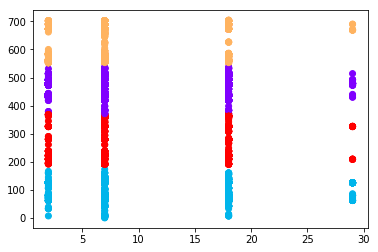

In [7]:
plt.scatter(data.loc[:,'province_id'], data.loc[:,'variety_numerical'], c=labels, cmap='rainbow')    
plt.show()

## add analysis

In [8]:
cluster = AgglomerativeClustering(n_clusters=n, affinity='euclidean', linkage='average').fit(clustering_data)

labels = cluster.labels_
print("\n\nClusters:")
label_count(labels)



Clusters:
{0: 13653, 1: 6620, 4: 1731, 3: 5, 2: 1}


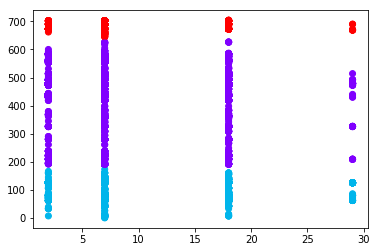

In [9]:
plt.scatter(data.loc[:,'province_id'], data.loc[:,'variety_numerical'], c=labels, cmap='rainbow')    
plt.show()

## add analysis

In [10]:
warnings.simplefilter('ignore')
gmm = mixture.GMM(n_components=n).fit(clustering_data)
labels = gmm.predict(clustering_data)
print("\n\nClusters:")
label_count(labels)



Clusters:
{1: 2558, 2: 12502, 0: 2598, 4: 4346, 3: 6}


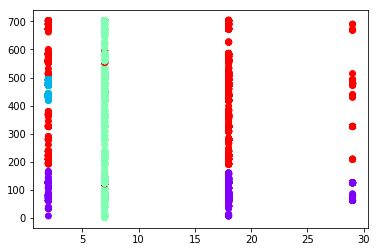

In [11]:
plt.scatter(data.loc[:,'province_id'], data.loc[:,'variety_numerical'], c=labels, cmap='rainbow')    
plt.show()

## add analysis

Cluster our data based on the points and price of each wine.

In [12]:
clustering_data = data.loc[:,['points','price']]
clustering_data.head()

,points,price
0,87,65.0
1,87,19.0
2,87,22.0
3,87,69.0
4,86,50.0


In [13]:
cluster = KMeans(n_clusters = n, random_state = 0).fit(clustering_data)

labels = cluster.labels_
print("\n\nClusters:")
label_count(labels)



Clusters:
{3: 8409, 0: 11240, 1: 2094, 4: 266, 2: 1}


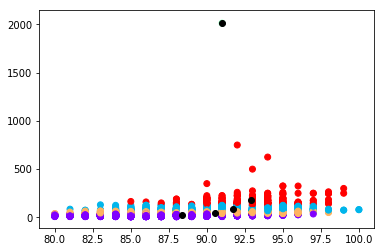

In [14]:
plt.scatter(data.loc[:,'points'], data.loc[:,'price'], c=labels, cmap='rainbow')    
plt.scatter(cluster.cluster_centers_[:,0] ,cluster.cluster_centers_[:,1], color='black') 
plt.show()

# conclusion